In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import cartopy.feature as cf
from sklearn.metrics import mean_absolute_error,mean_squared_error
from netCDF4 import Dataset
import cartopy.feature as cfe

/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/lucasdmarten/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


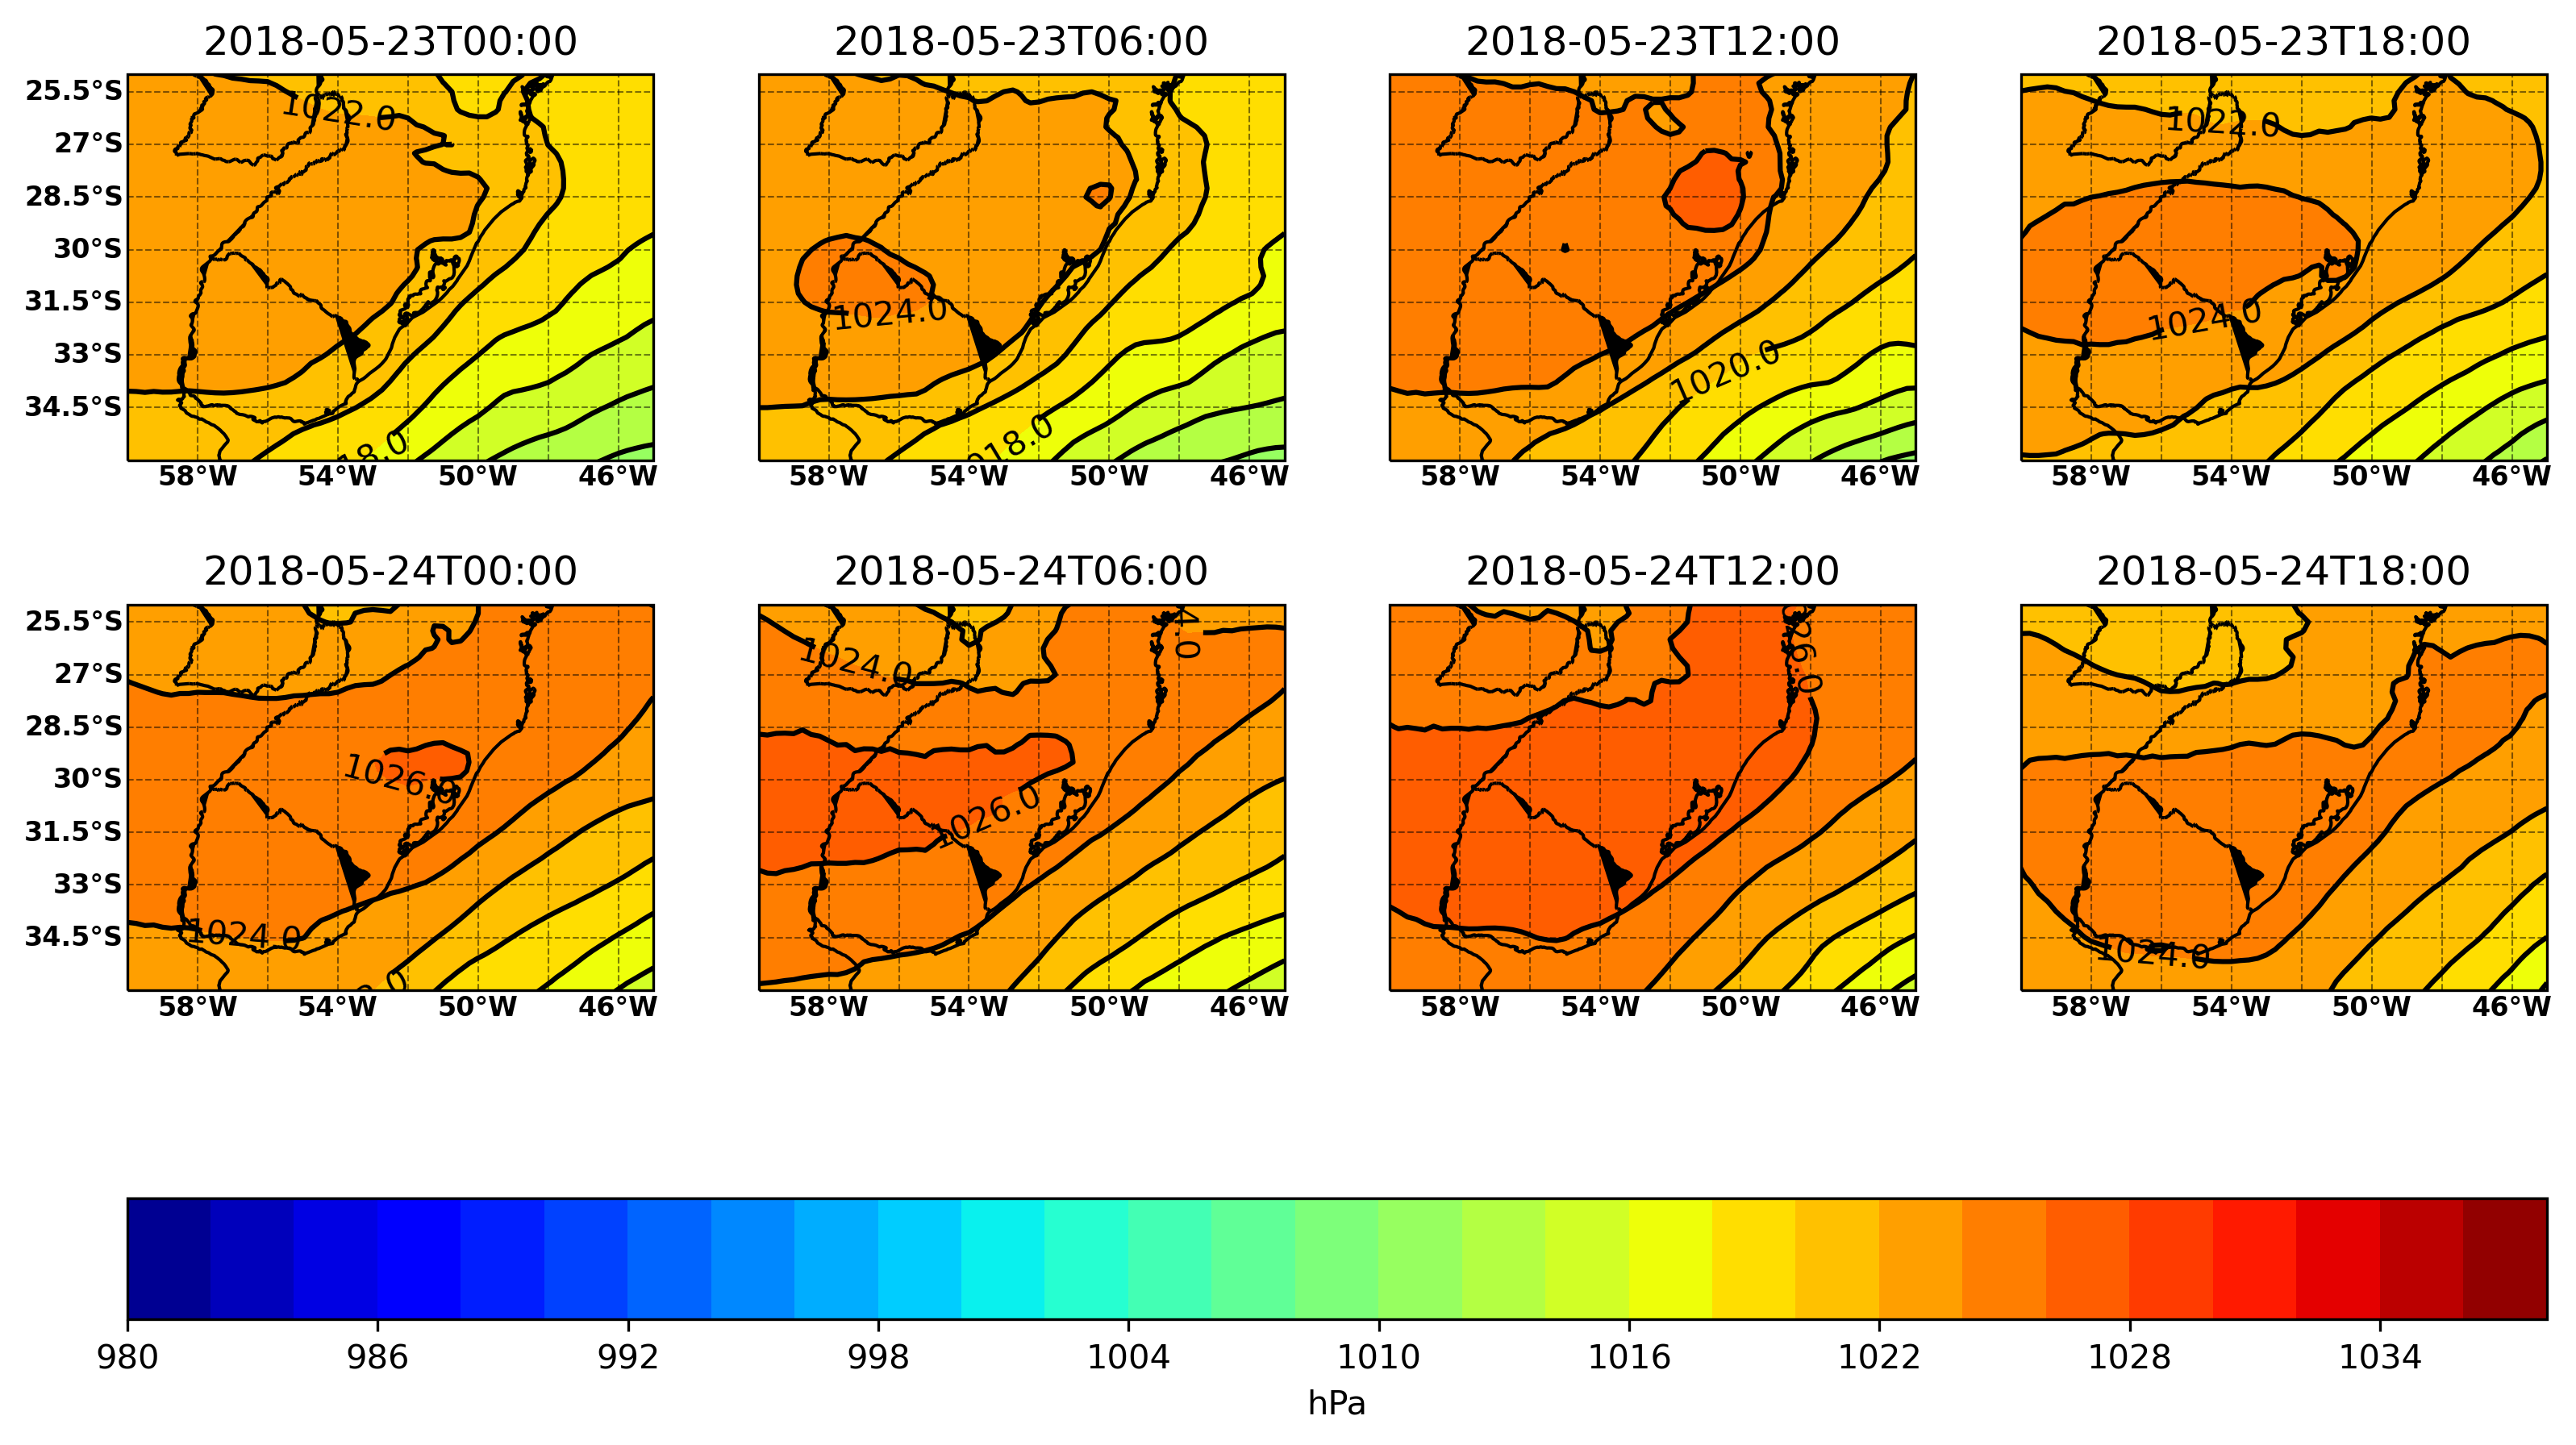

In [55]:
d = xr.open_dataset('./dados_sinóticos/surface_level.nc')
d = d.sel(time=slice('2018-05-23 00:00:00','2018-05-25 00:00:00'))
blh = d['msl']
blh = blh * 10**(-2)
lon = d['longitude']
lat = d['latitude']
time = d['time']
n_plots = 8
j=0
width = 2000
height = 1000
dpi = 100
resolution = '10m'
fig = plt.figure(figsize=(20, 10), dpi=300)
axs=[]
levels = list(range(980,1040,2))
for i in range(1,n_plots+1):
    
    ax= plt.subplot(4, 4, i, projection=ccrs.PlateCarree())
    ax.coastlines()
    feature=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                            name='admin_0_boundary_lines_land', 
                            color='black' ,edgecolor='face',
                            facecolor=cfe.COLORS['land'])
    ax.add_feature(feature)
    ax.set_extent([-60,-45,-25,-36])
    cb = ax.contourf(lon,lat,blh[j,:,:],levels,cmap=get_cmap('jet'))
    cb2 = ax.contour(lon,lat,blh[j,:,:],levels, colors='black')
    plt.clabel(cb2,fmt='%1.1f')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                      linewidth=.5, color='black', alpha=0.5)
    if i == 1:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
    elif i == 5:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
        
    else:
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.ylabels_right = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    ax.set_title('{}'.format(str(d['time'][j].values)[:16]))
    axs.append(ax)
    j+=6
plt.subplots_adjust(left=1, bottom=0.5, right=1.5, top=1.7, wspace=None, hspace=None)
fig.colorbar(cb, ax=axs, orientation='horizontal', label='hPa')
plt.savefig('msl_caso1.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.show()

In [54]:
plt.colorbar?

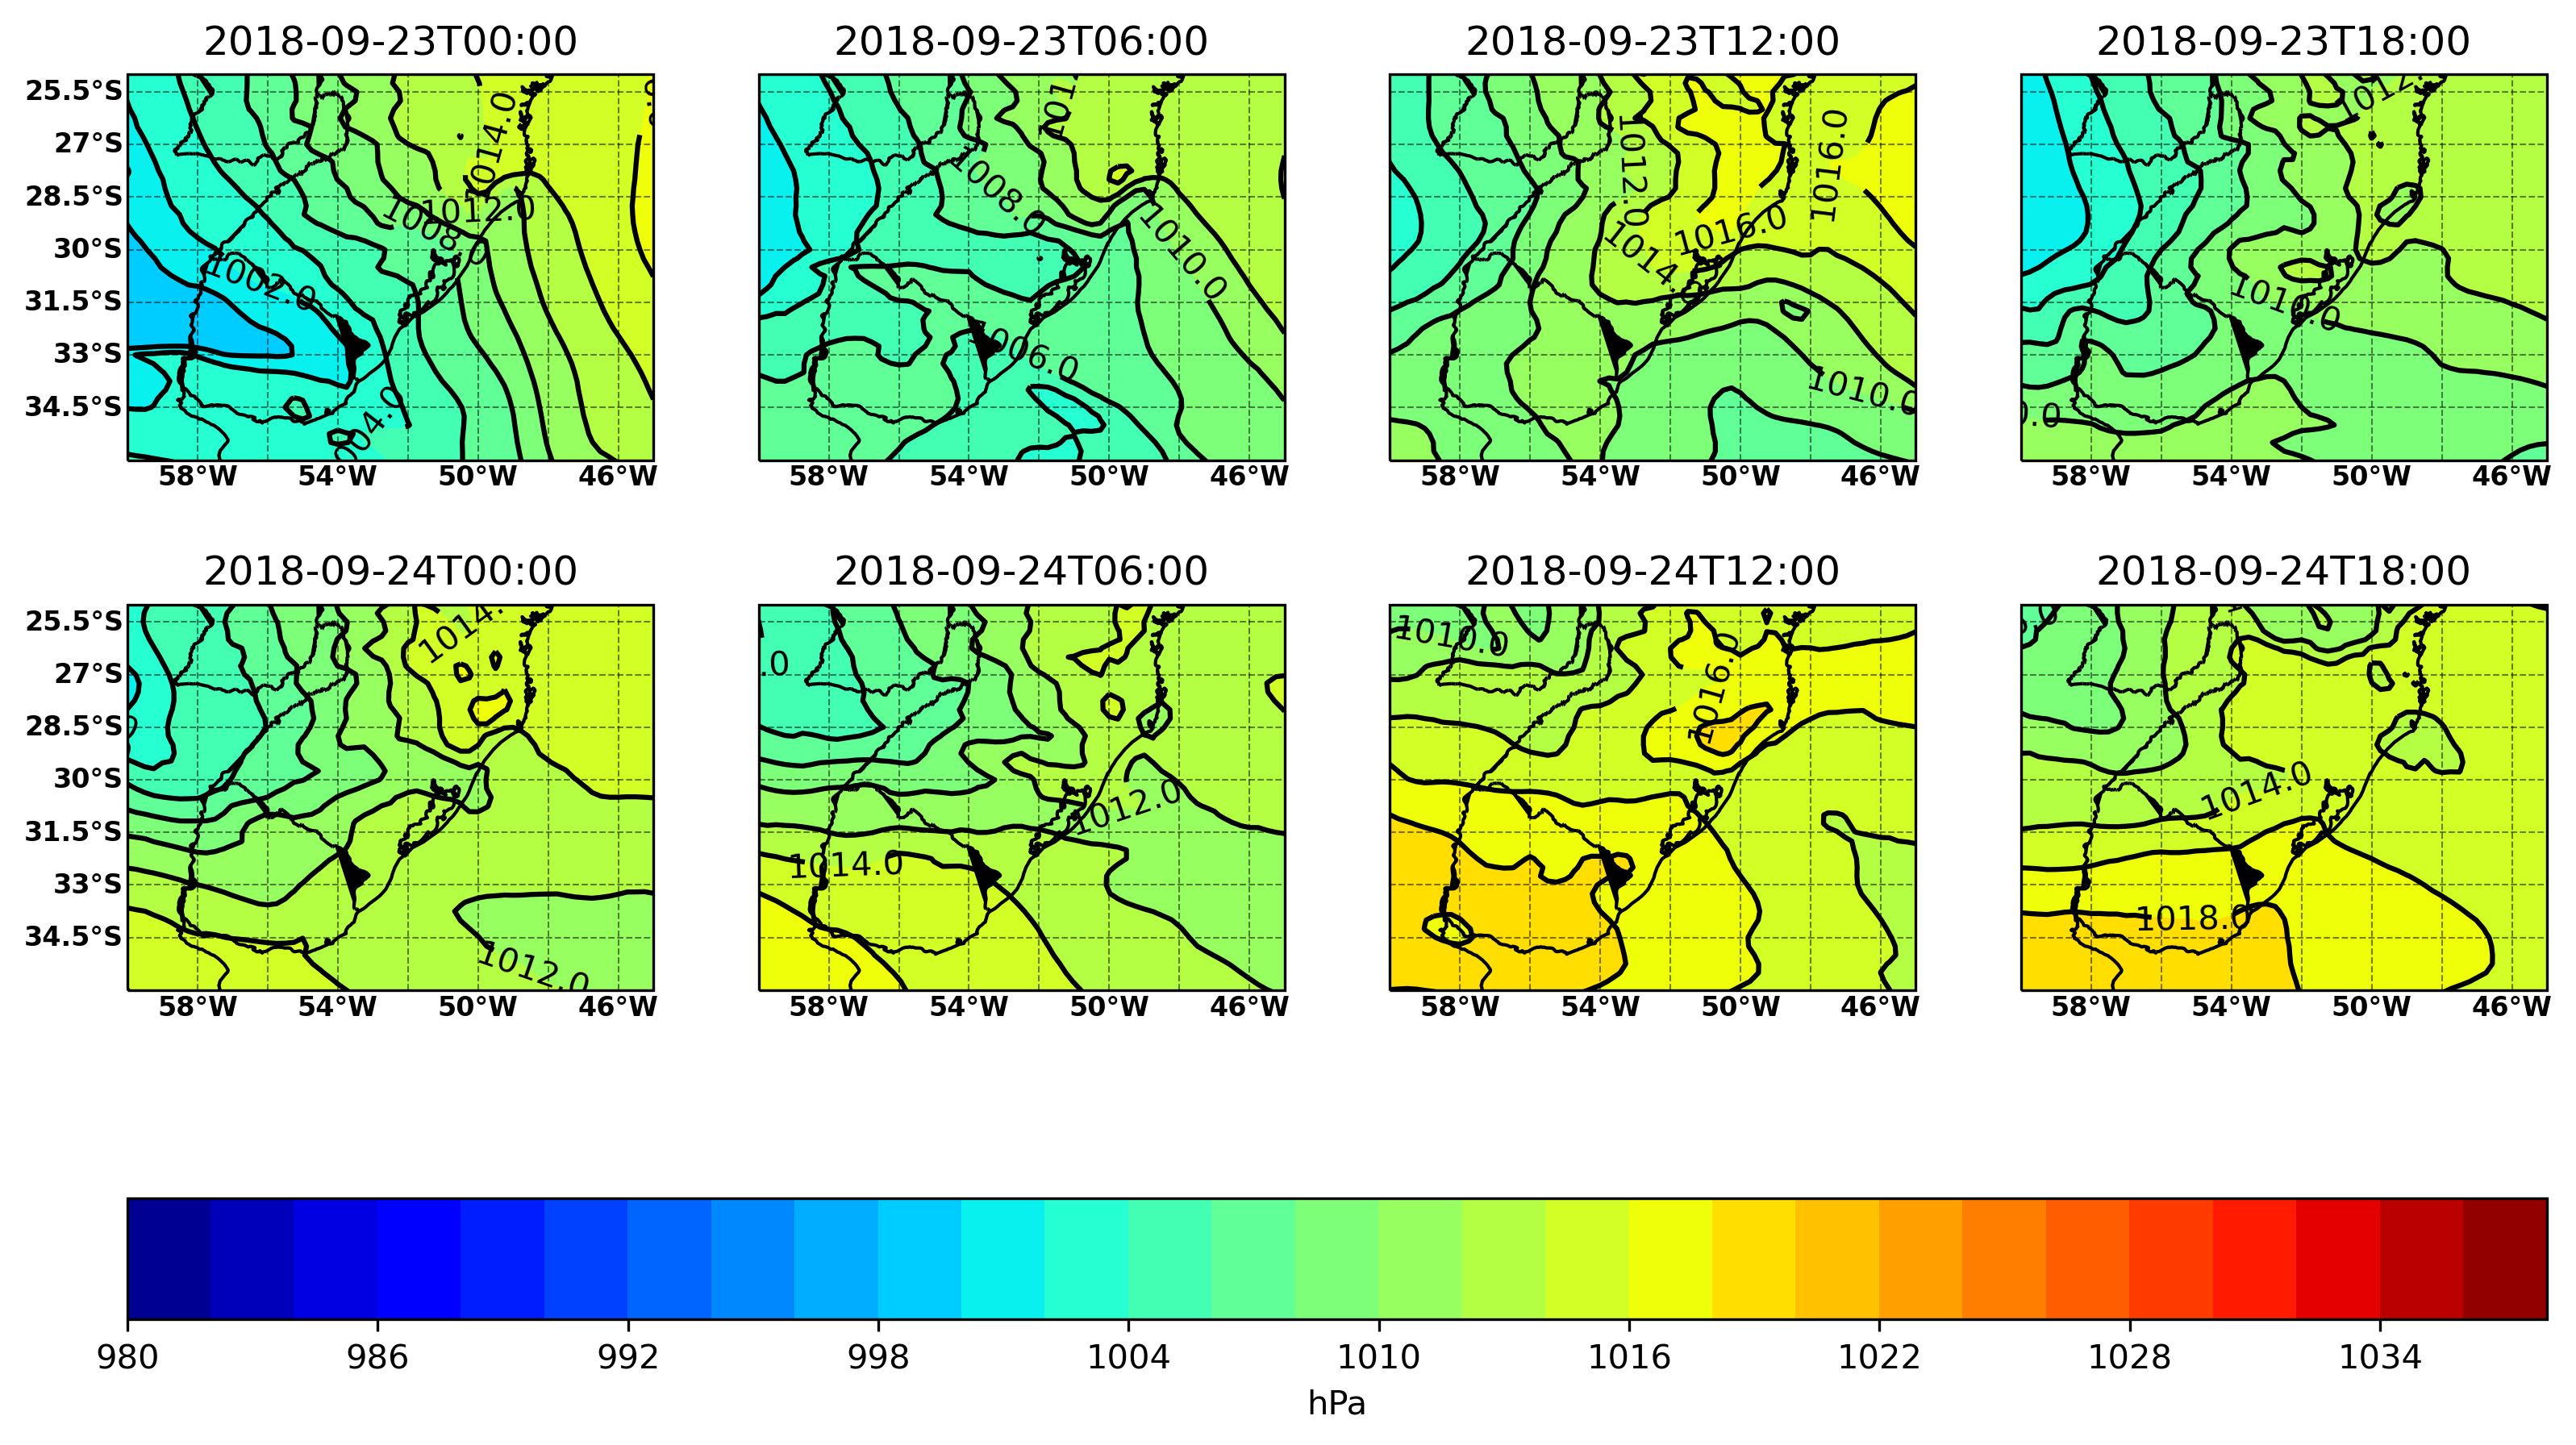

In [56]:
d = xr.open_dataset('./dados_sinóticos/surface_level.nc')
d = d.sel(time=slice('2018-09-23 00:00:00','2018-09-25 00:00:00'))
blh = d['msl']
blh = blh * 10**(-2)
lon = d['longitude']
lat = d['latitude']
time = d['time']
n_plots = 8
j=0

resolution = '10m'
fig = plt.figure(figsize=(20, 10), dpi=300)
axs=[]
levels = list(range(980,1040,2))
for i in range(1,n_plots+1):
    
    ax= plt.subplot(4, 4, i, projection=ccrs.PlateCarree())
    ax.coastlines()
    feature=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                            name='admin_0_boundary_lines_land', 
                            color='black' ,edgecolor='face',
                            facecolor=cfe.COLORS['land'])
    ax.add_feature(feature)
    ax.set_extent([-60,-45,-25,-36])
    cb = ax.contourf(lon,lat,blh[j,:,:],levels,cmap=get_cmap('jet'))
    cb2 = ax.contour(lon,lat,blh[j,:,:],levels, colors='black')
    plt.clabel(cb2,fmt='%1.1f')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                      linewidth=.5, color='black', alpha=0.5)
    if i == 1:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
    elif i == 5:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
        
    else:
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.ylabels_right = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    ax.set_title('{}'.format(str(d['time'][j].values)[:16]))
    axs.append(ax)
    j+=6
plt.subplots_adjust(left=1, bottom=0.5, right=1.5, top=1.7, wspace=None, hspace=None)
fig.colorbar(cb, ax=axs, orientation='horizontal', label='hPa')
plt.savefig('msl_caso2.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)

In [23]:
d

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 101, time: 49)
Coordinates:
  * longitude  (longitude) float32 -70.0 -69.75 -69.5 ... -45.5 -45.25 -45.0
  * latitude   (latitude) float32 -10.0 -10.25 -10.5 ... -69.5 -69.75 -70.0
  * time       (time) datetime64[ns] 2018-05-23 ... 2018-05-25
Data variables: (12/17)
    u100       (time, latitude, longitude) float32 ...
    v100       (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    ...         ...
    msl        (time, latitude, longitude) float32 ...
    z          (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    slhf       (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-04-18 16:14:56 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

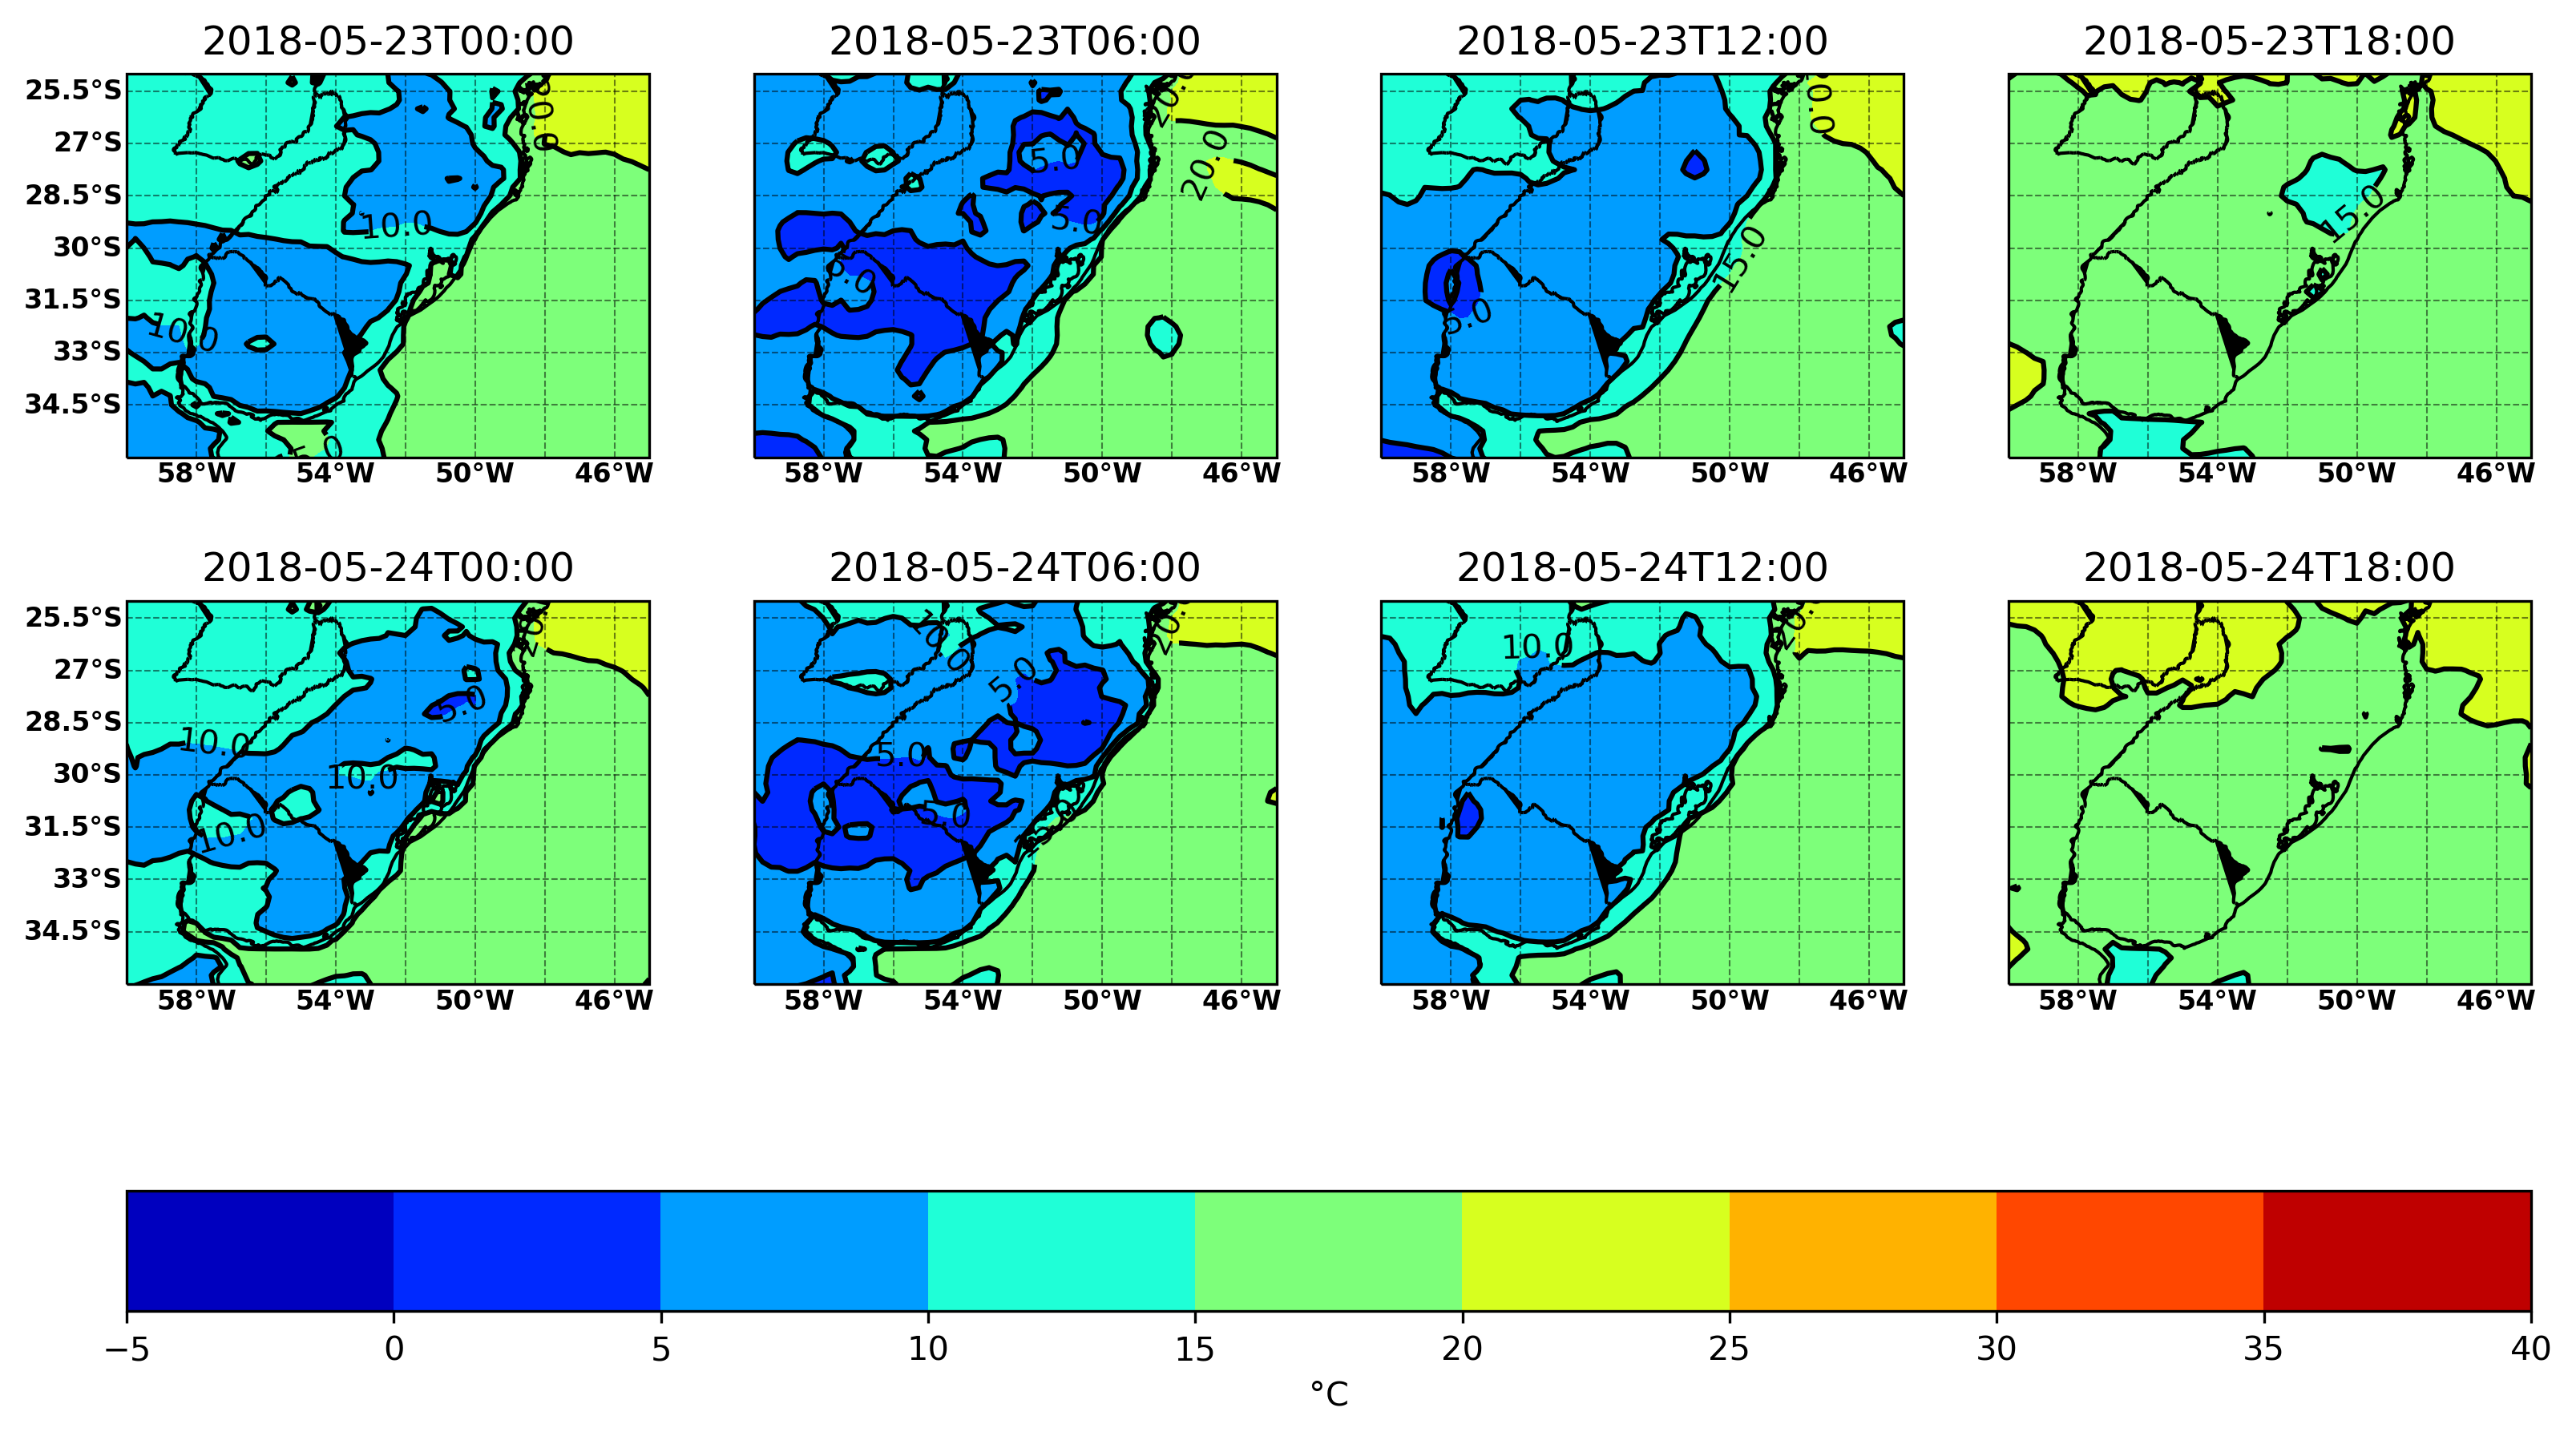

In [57]:
d = xr.open_dataset('./dados_sinóticos/surface_level.nc')
d = d.sel(time=slice('2018-05-23 00:00:00','2018-05-25 00:00:00'))
blh = d['t2m'] - 273.15
# blh = blh * 10**(-2)
lon = d['longitude']
lat = d['latitude']
time = d['time']
n_plots = 8
j=0
width = 2000
height = 1000
dpi = 100
resolution = '10m'
fig = plt.figure(figsize=(20, 10), dpi=300)
axs=[]
levels = list(range(-5,45,5))
for i in range(1,n_plots+1):
    
    ax= plt.subplot(4, 4, i, projection=ccrs.PlateCarree())
    ax.coastlines()
    feature=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                            name='admin_0_boundary_lines_land', 
                            color='black' ,edgecolor='face',
                            facecolor=cfe.COLORS['land'])
    ax.add_feature(feature)
    ax.set_extent([-60,-45,-25,-36])
    cb = ax.contourf(lon,lat,blh[j,:,:],levels,cmap=get_cmap('jet'))
    cb2 = ax.contour(lon,lat,blh[j,:,:],levels, colors='black')
    plt.clabel(cb2,fmt='%1.1f')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                      linewidth=.5, color='black', alpha=0.5)
    if i == 1:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
    elif i == 5:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
        
    else:
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.ylabels_right = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    ax.set_title('{}'.format(str(d['time'][j].values)[:16]))
    axs.append(ax)
    j+=6
plt.subplots_adjust(left=1, bottom=0.5, right=1.5, top=1.7, wspace=None, hspace=None)
fig.colorbar(cb, ax=axs, orientation='horizontal', label='°C')
plt.savefig('t2m_caso1.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.show()

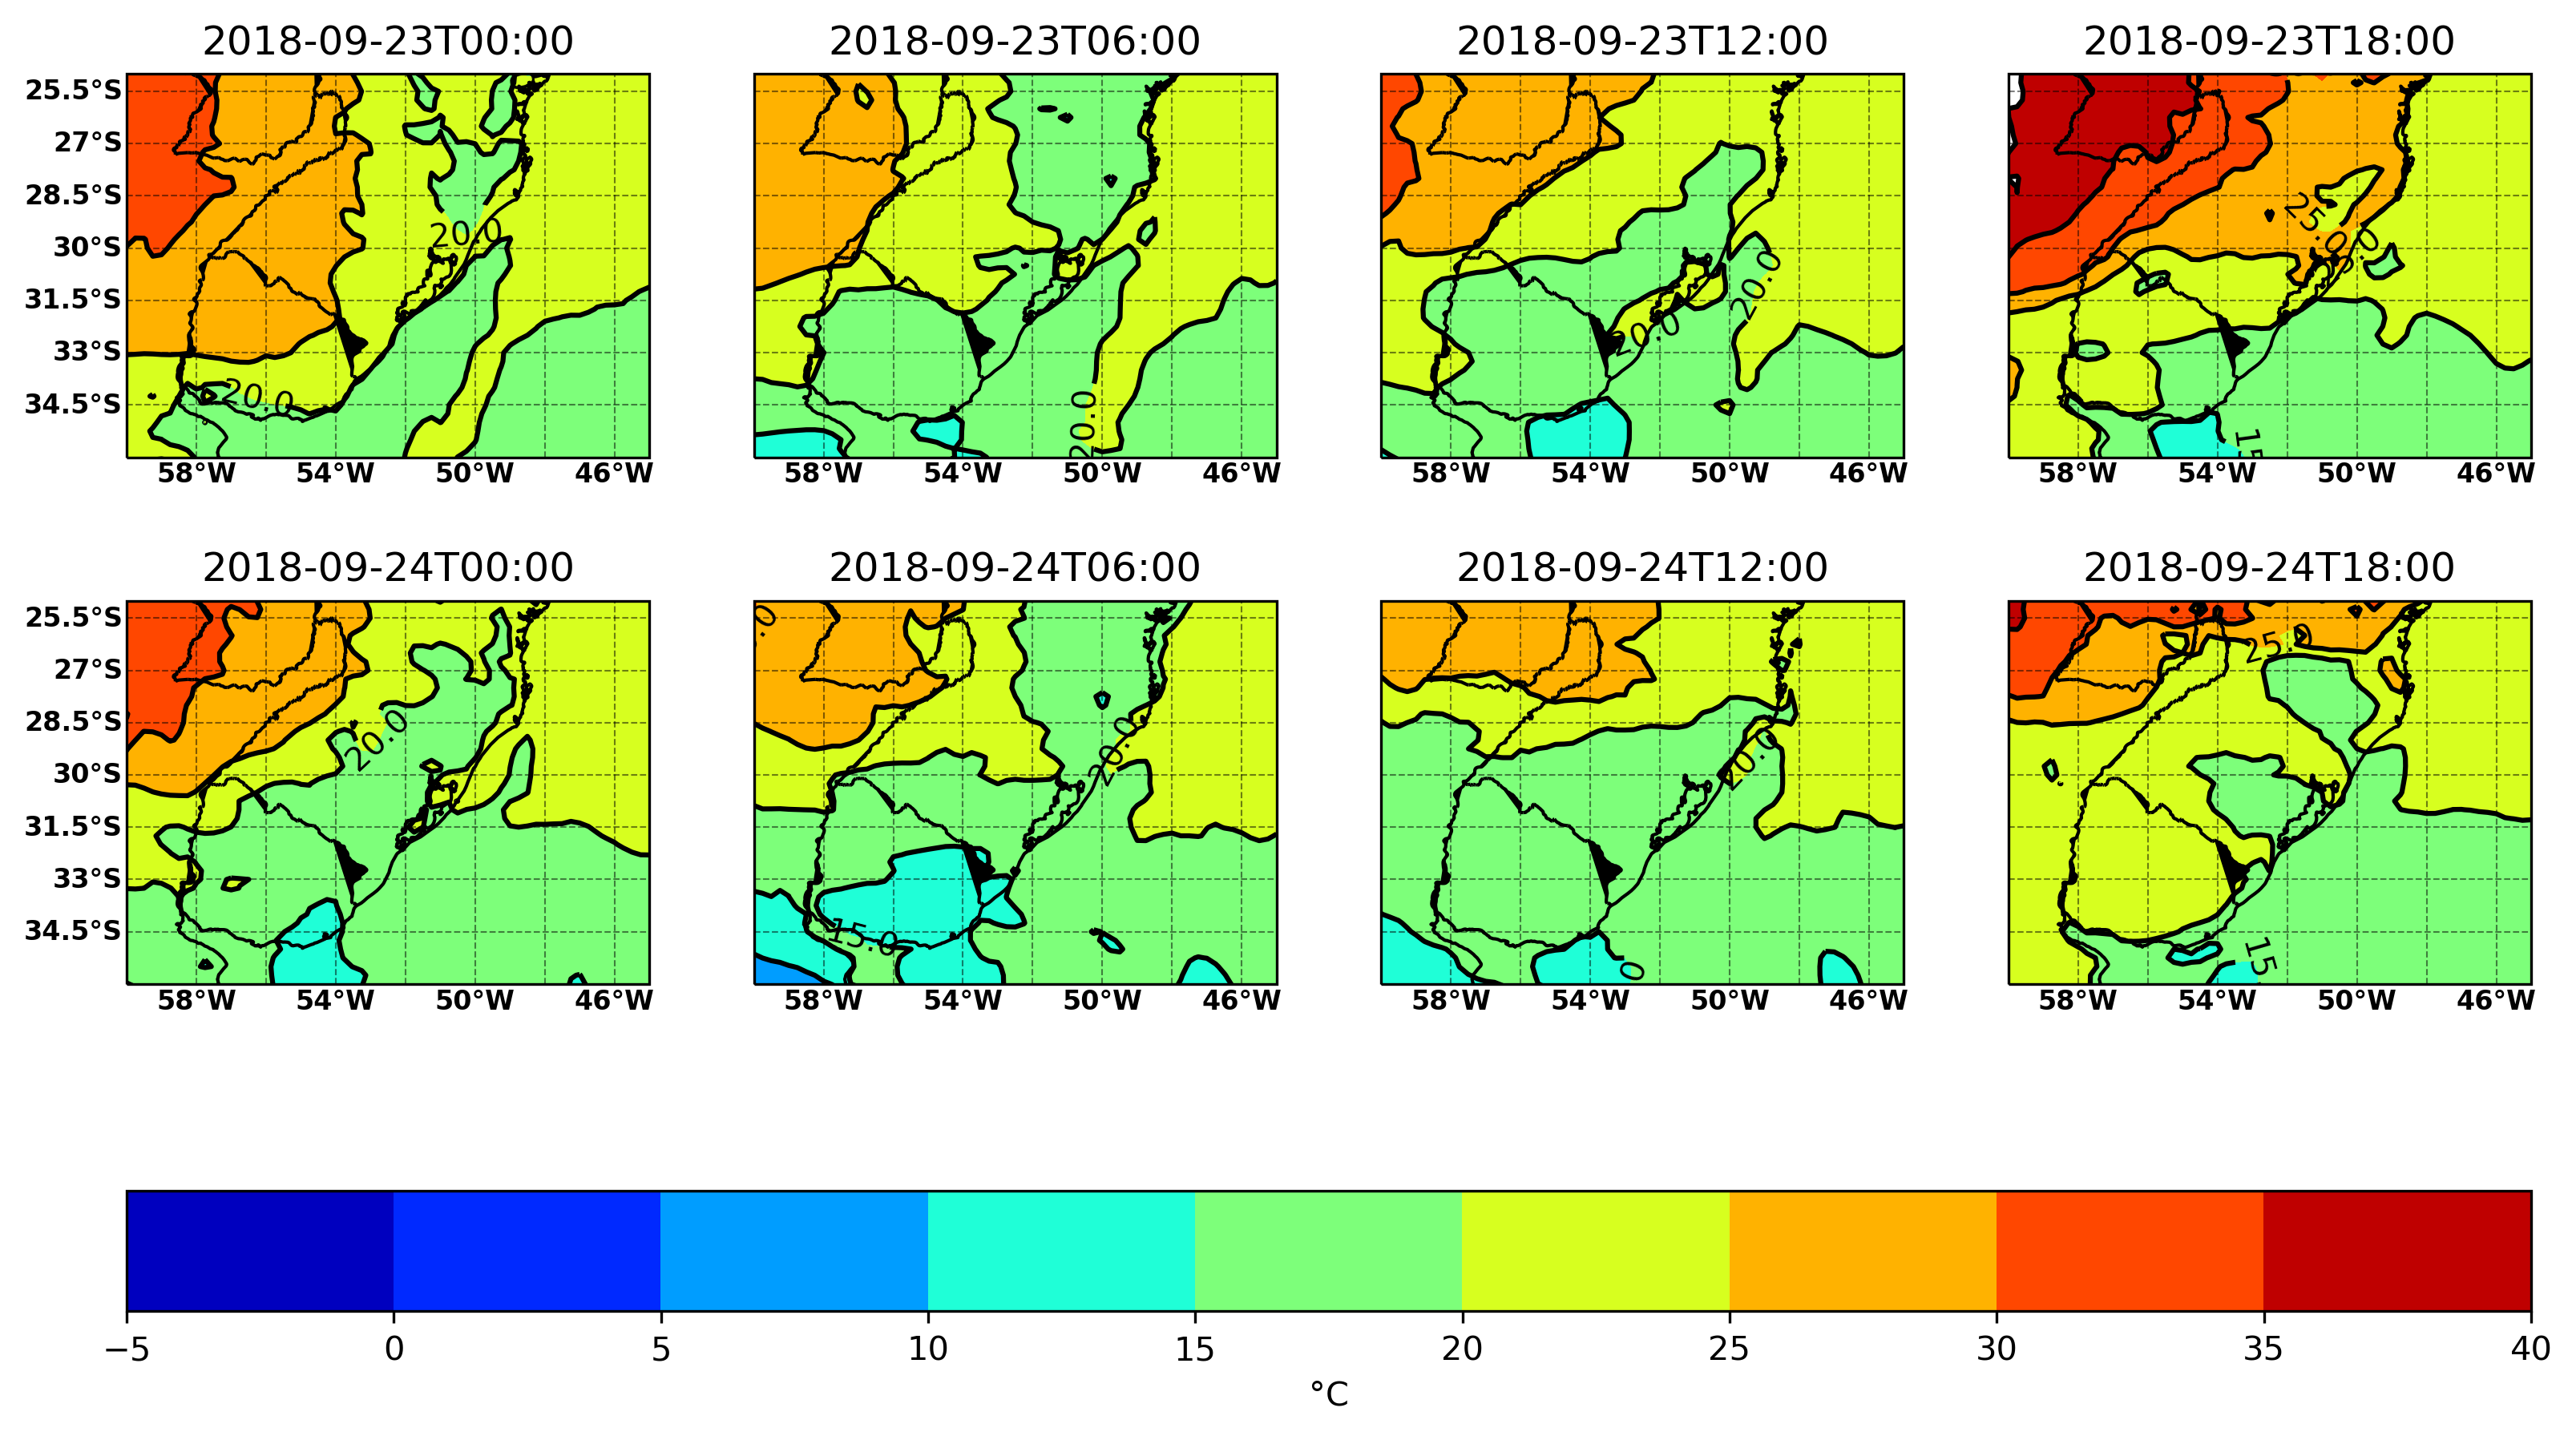

In [64]:
d = xr.open_dataset('./dados_sinóticos/surface_level.nc')
d = d.sel(time=slice('2018-09-23 00:00:00','2018-09-25 00:00:00'))
blh = d['t2m'] - 273.15
# blh = blh * 10**(-2)
lon = d['longitude']
lat = d['latitude']
time = d['time']
n_plots = 8
j=0
width = 2000
height = 1000
dpi = 100
resolution = '10m'
fig = plt.figure(figsize=(20, 10), dpi=300)
axs=[]
levels = list(range(-5,45,5))
for i in range(1,n_plots+1):
    
    ax= plt.subplot(4, 4, i, projection=ccrs.PlateCarree())
    ax.coastlines()
    feature=cfe.NaturalEarthFeature(category='cultural', scale='10m', 
                            name='admin_0_boundary_lines_land', 
                            color='black' ,edgecolor='face',
                            facecolor=cfe.COLORS['land'])
    ax.add_feature(feature)
    ax.set_extent([-60,-45,-25,-36])
    cb = ax.contourf(lon,lat,blh[j,:,:],levels,cmap=get_cmap('jet'))
    cb2 = ax.contour(lon,lat,blh[j,:,:],levels, colors='black')
    plt.clabel(cb2,fmt='%1.1f')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',
                      linewidth=.5, color='black', alpha=0.5)
    if i == 1:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
    elif i == 5:
        gl.ylabels_left = True
        gl.ylabels_right = False
        gl.xlabels_top = False
        
    else:
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.ylabels_right = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.xlabel_style = {'size':8,'color': 'black', 'weight': 'bold'}
    ax.set_title('{}'.format(str(d['time'][j].values)[:16]))
    axs.append(ax)
    j+=6
plt.subplots_adjust(left=1, bottom=0.5, right=1.5, top=1.7, wspace=None, hspace=None)
fig.colorbar(cb, ax=axs, orientation='horizontal', label='°C')
plt.savefig('t2m_caso2.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.show()

In [ ]:
fig.

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = get_cmap('jet', 256)
newcolors = viridis(np.linspace(0, 1, 1000))


roxo = np.array([123/256, 104/256, 238/256, 1])
azul = np.array([0/256, 0/256, 255/256, 1])
ciano = np.array([0/256, 255/256, 255/256, 1])
verde = np.array([0/256, 128/256, 0/256, 1])
amarelo = np.array([255/256, 255/256, 0/256, 1])
vermelho = np.array([255/256, 0/256, 0/256, 1])



newcolors[:10, :] = roxo
newcolors[10:20, :] = azul
newcolors[20:30, :] = ciano
newcolors[30:40, :] = verde
newcolors[40:50, :] = amarelo
newcolors[50:, :] = vermelho

# newcolors[101:150, :] = ForestGreen

newcmp = ListedColormap(newcolors)
ForestGreen = np.array([34/256, 139/256, 34/256, 1])
Green = np.array([0/256, 128/256, 0/256, 1])
DarkGreen = np.array([0/256, 100/256, 0/256, 1])



colors = [ForestGreen,Green,DarkGreen]

In [ ]:
plt.figure?